# Red-Wine quality project

Objective: To determine which physiochemical properties make a wine 'good'.

We will follow the following steps to carry out the project:

1) Importing neccessary packages.

2) Loading dataset.

3) Plotting graphs.

4) Pre-processing datasets.

5) Creating ML model.

6) Tuning

# Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Loading Dataset

In [2]:
wine_df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")

In [3]:
# we will find out the rows and columns in the dataset

print("Dataset Shape:", wine_df.shape)

Dataset Shape: (1599, 12)


In [4]:
# checking data distribution
# head shows first five entries in the dataset

wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#getting the information about the rows

wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


we can safely assume that quality is a dependent variable and rest of the 11 columns are independent variables

Also, there are no null values in the dataset. So no treatment will be applied to the dataset.

# Plotting graphs for further insights into data

we will check the dependent variable v/s the independent variable

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

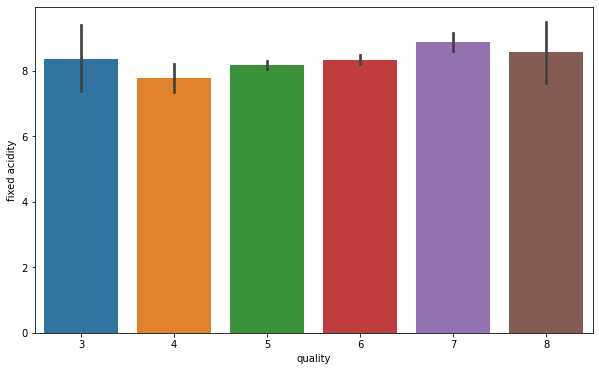

In [6]:
#fixed acidity vs quality

plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine_df)

No particular patten.

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

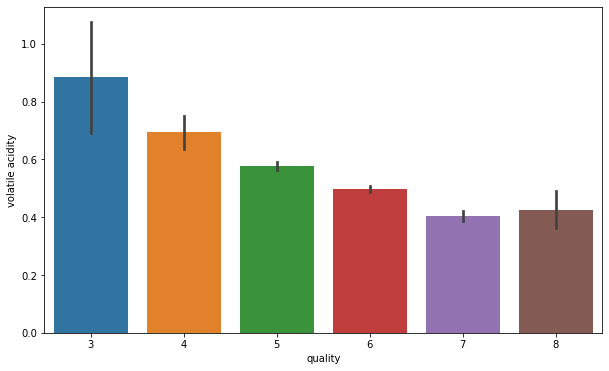

In [7]:
#volatile acidity vs quality

plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='volatile acidity', data=wine_df)

from above graph we can conclude that the quality increases as volatile acidity decreases except when quality is at max, there is a slight increase in volatile acidity

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

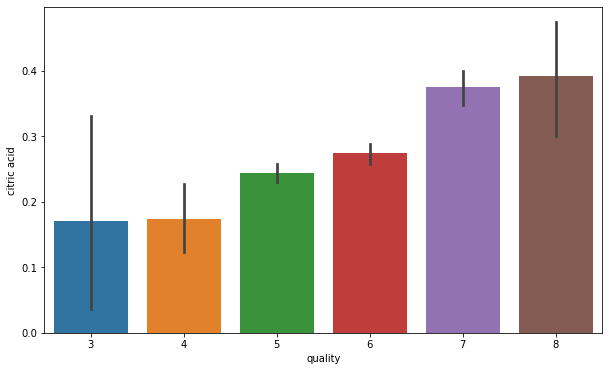

In [8]:
# citric acid v/s quality

plt.figure(figsize=(10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine_df)

As the citric acid content is increasing the quality of wine is also increasing

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

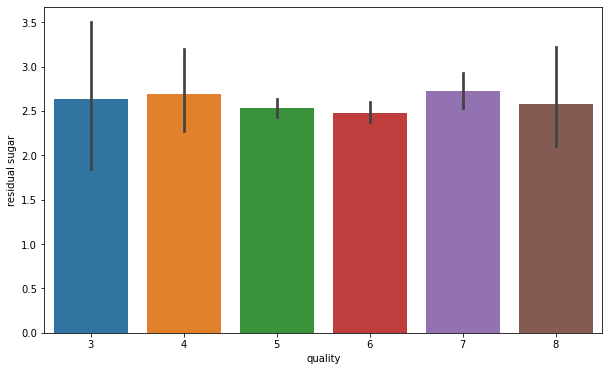

In [9]:
# residual sugar v/s quality

plt.figure(figsize=(10,6))

sns.barplot(x = 'quality', y = 'residual sugar', data = wine_df)

No pattern can be detected from above graph

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

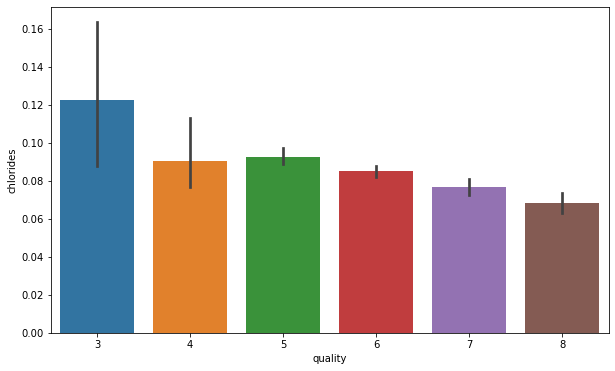

In [10]:
# chlorides v/s quality

plt.figure(figsize=(10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine_df)


the quality increases as the chloride content decreases

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

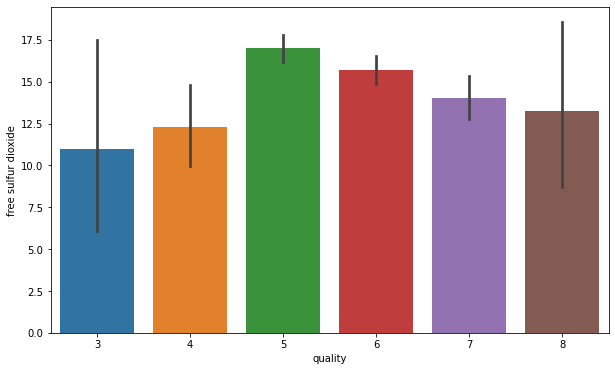

In [11]:
# free sulphur dioxide v/s quality

plt.figure(figsize=(10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine_df)

no trend detected

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

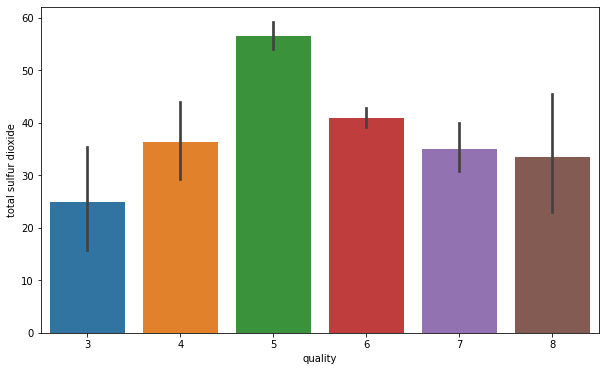

In [12]:
#total sulfur dioxide v/s quality

plt.figure(figsize=(10,6))
sns.barplot( x = 'quality', y = 'total sulfur dioxide', data = wine_df)

no trend visible

<AxesSubplot:xlabel='quality', ylabel='density'>

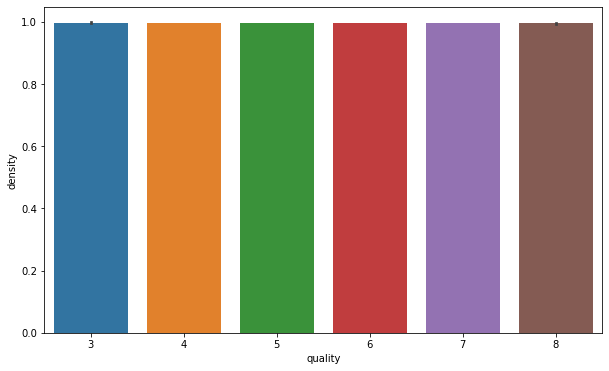

In [13]:
#density v/s quality

plt.figure(figsize=(10,6))
sns.barplot( x = 'quality', y = 'density', data = wine_df)


since density is not changing a lot the barplot looks as above

<AxesSubplot:xlabel='quality', ylabel='pH'>

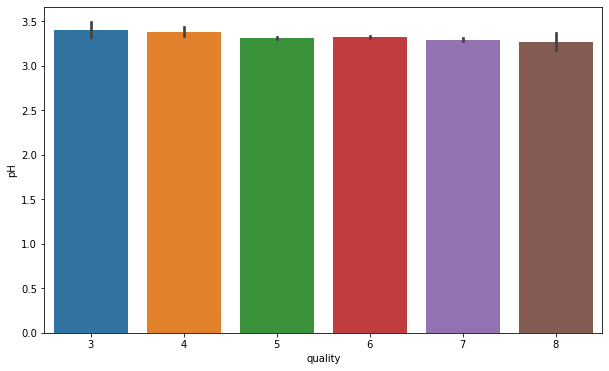

In [14]:
#ph v/s quality

plt.figure(figsize=(10,6))
sns.barplot(x= 'quality', y = 'pH', data = wine_df)

since there is no variation in pH that much thus the graph is as above, but a downward trend can be followed

# plotting sulphates v/s quality

plt.figure(figsize=(10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine_df)

as the sulphate quantity increases, the quality of wine gets better

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

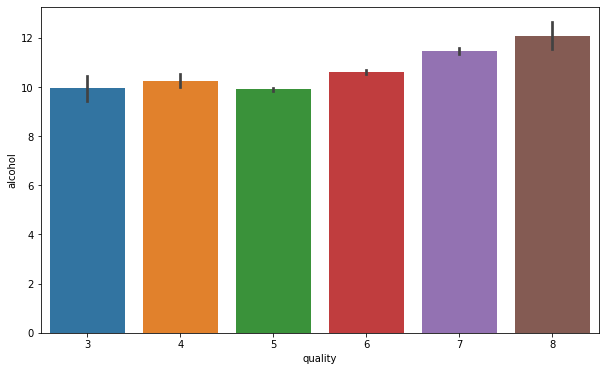

In [15]:
# plotting alcohol v/s quality

plt.figure(figsize=(10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine_df)

wine quality gets better with increase in alcohol content

# Pre-processing data for ML algorithm

In [16]:
wine_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [17]:
# classifying the wine as good or bad based on the quality score
# 'bad' or 0 if the quality of wine lies between the range(3,6)
# 'good' or 1 if the quality of wine lies between the range (7,8)

wine_df['quality']=wine_df['quality'].apply(lambda x: 1 if x > 6.5 else 0 )
wine_df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [18]:
print(wine_df['quality'].value_counts())

0    1382
1     217
Name: quality, dtype: int64


C:\Users\91950\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

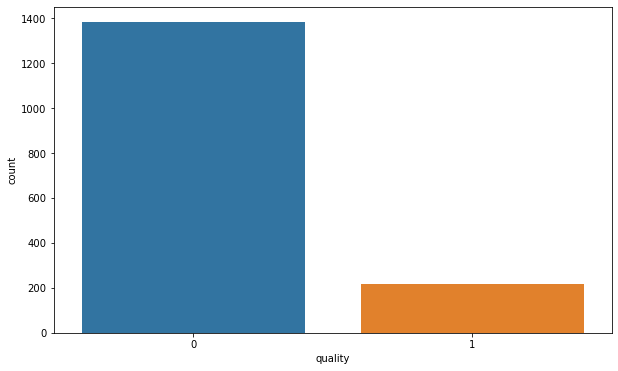

In [19]:
fig = plt.figure(figsize=(10,6))
sns.countplot(wine_df['quality'])

In [20]:
# separating dependent and independent variables

X= wine_df.iloc[:, :-1].values
y= wine_df.iloc[:, -1].values

In [21]:
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [22]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
#splitting into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print("X-train Shape:",X_train.shape)
print("X-test Shape:",X_test.shape)
print("y-train Shape:", y_train.shape)
print("y-test Shape:", y_test.shape)

X-train Shape: (1279, 11)
X-test Shape: (320, 11)
y-train Shape: (1279,)
y-test Shape: (320,)


In [24]:
# Applying standard scaling to the dataset to scale all the field values to same scale (approx.)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Using ML algorithms

# 1) Random forest classifier

In [25]:
#creating random forest classifier instance

rf_regressor = RandomForestClassifier(n_estimators=100)

# Fitting the classifier with training data

rf_regressor.fit(X_train, y_train)

# Predicting using classifier

y_pred = rf_regressor.predict(X_test)



[[266   7]
 [ 31  16]]


<Figure size 720x432 with 0 Axes>

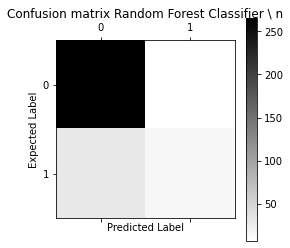

In [26]:
# confusion matrix using random forest classifier

cm = confusion_matrix(y_test, y_pred)
print(cm)


#matplot for confusion matrix of Random Forest Classifier

fig = plt.figure(figsize=(10,6))
plt.matshow(cm,cmap=plt.cm.binary,interpolation ='nearest')
plt.title("Confusion matrix Random Forest Classifier \ n")

plt.colorbar()
plt.ylabel("Expected Label")
plt.xlabel("Predicted Label")
plt.show()

In [27]:
print("Total Preditions:", len(y_pred))
print("Correct Prediction:", sum(y_pred == y_test))

print("Incorrect Prediction:", sum(y_pred != y_test))

print("Accuracy:", sum(y_pred == y_test)*100/len(y_pred),"%")

Total Preditions: 320
Correct Prediction: 282
Incorrect Prediction: 38
Accuracy: 88.125 %


# Support vector classifier (SVC)

In [28]:
#support vector classifier instance

svc_regressor = SVC()

# fitting train data to SVC

svc_regressor.fit(X_train, y_train)

# predicting using SVC

y_pred = svc_regressor.predict(X_test)

[[268   5]
 [ 35  12]]


<Figure size 720x432 with 0 Axes>

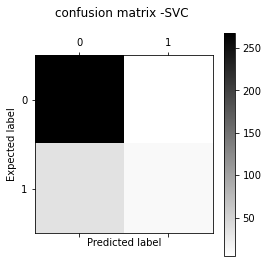

In [29]:
# confusion matix using the support vector classifier

cm = confusion_matrix(y_test, y_pred)
print(cm)

#matplot for confusion matrix of support vector classifier

fig = plt.figure(figsize=(10,6))

plt.matshow(cm, cmap = plt.cm.binary, interpolation = 'nearest')

plt.title("confusion matrix -SVC \n")

plt.colorbar()

plt.ylabel("Expected label")
plt.xlabel("Predicted label")
plt.show()

In [30]:
print("Total predictions:", len(y_pred))
print("Correct Predictions:", sum(y_pred == y_test))
print("Incorrect predictions:", sum(y_pred != y_test))
print("Accuracy:", sum(y_pred == y_test) *100/len(y_pred),"%")


Total predictions: 320
Correct Predictions: 280
Incorrect predictions: 40
Accuracy: 87.5 %


# Tuning ML algorithm


1) SVC


In [31]:
#  finding parameters for svc models

param = {
    'C':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear','rbf'],
    'gamma':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}

grid_svc = GridSearchCV(svc_regressor, param_grid = param, scoring ='accuracy', cv = 10)

In [32]:
grid_svc.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [33]:
print("Best Parameters for SVC:", grid_svc.best_params_)

Best Parameters for SVC: {'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}


confusion matrix: 
 [[271   2]
 [ 31  16]]


Text(0, 0.5, 'expected label')

<Figure size 720x432 with 0 Axes>

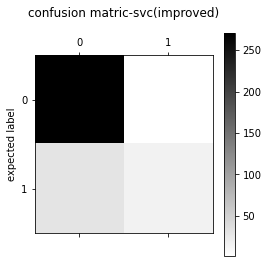

In [34]:
svc_regressor2 = SVC(C=1.2, gamma = 0.9, kernel ='rbf')

svc_regressor2.fit(X_train, y_train)
y_pred_svc = svc_regressor2.predict(X_test)

cm_svc2 = confusion_matrix(y_test, y_pred_svc)

print("confusion matrix: \n", cm_svc2)


fig= plt.figure(figsize=(10,6))

plt.matshow(cm_svc2,cmap=plt.cm.binary, interpolation = 'nearest')

plt.title("confusion matric-svc(improved)\n")

plt.colorbar()
plt.ylabel("expected label")

In [35]:
print("Total predictions:", len(y_pred_svc))
print("Correct Predictions:", sum(y_pred_svc== y_test))
print("Incorrect predictions:", sum(y_pred_svc != y_test))
print("Accuracy:", sum(y_pred_svc == y_test) *100/len(y_pred_svc),"%")

Total predictions: 320
Correct Predictions: 287
Incorrect predictions: 33
Accuracy: 89.6875 %


# (2) Random forest classifier

In [37]:
rf_eval = cross_val_score(estimator = rf_regressor, X=X_train, y = y_train, cv=10)
rf_eval.mean()

0.9124507874015748